<h1 style="text-align:center;font-size:36px;font-weight:bold;">Some tips on splicing and dicing Pandas DataFrames</h1>

In [2]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 15 October, 2024


<hr class="gray-line">
<font size="6">Outline:</font>

Pandas DataFrames (two-dimensional) and Series (one-dimensional) data structures are extensively used in the brightwind library for the storage, transfer and display of data. A simple explaination is a Series is simply a single column of data which can have a index and a DataFrame is multiple columns of data with an index. Both are explained in more detail here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

This tutorial will give a basic introduction to using these data structures and outline how to:

    1.Seperate specific columns from DataFrames into new DataFrames and Series

    2.Select specific ranges from DataFrames and Series using the index

    3.Search for a specific entry in a DataFrame or Series

<font size="6">1: Selecting Columns</font>

Data can be read into DataFrames easily from excel and csv files easily using the brightwind functions load_csv() and load_excel(). In the example below, data is read from the csv file demo_data into the DataFrame data.

In [6]:
import brightwind as bw
data = bw.load_csv(r'E:\Programs\brightwind\brightwind\demo_datasets\demo_data.csv')
data.head(5)

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


Once this data is loaded, the different columns and rows in the dataframe can be isolated for use in other calculations. To isolate the first column, Spd80mN, from the DataFrame data into the Series Wspd80mN the command is:

In [7]:
Wspd80mN = data['Spd80mN']

The series Wspd80mN can then be easily passed into a function such as monthly_means():

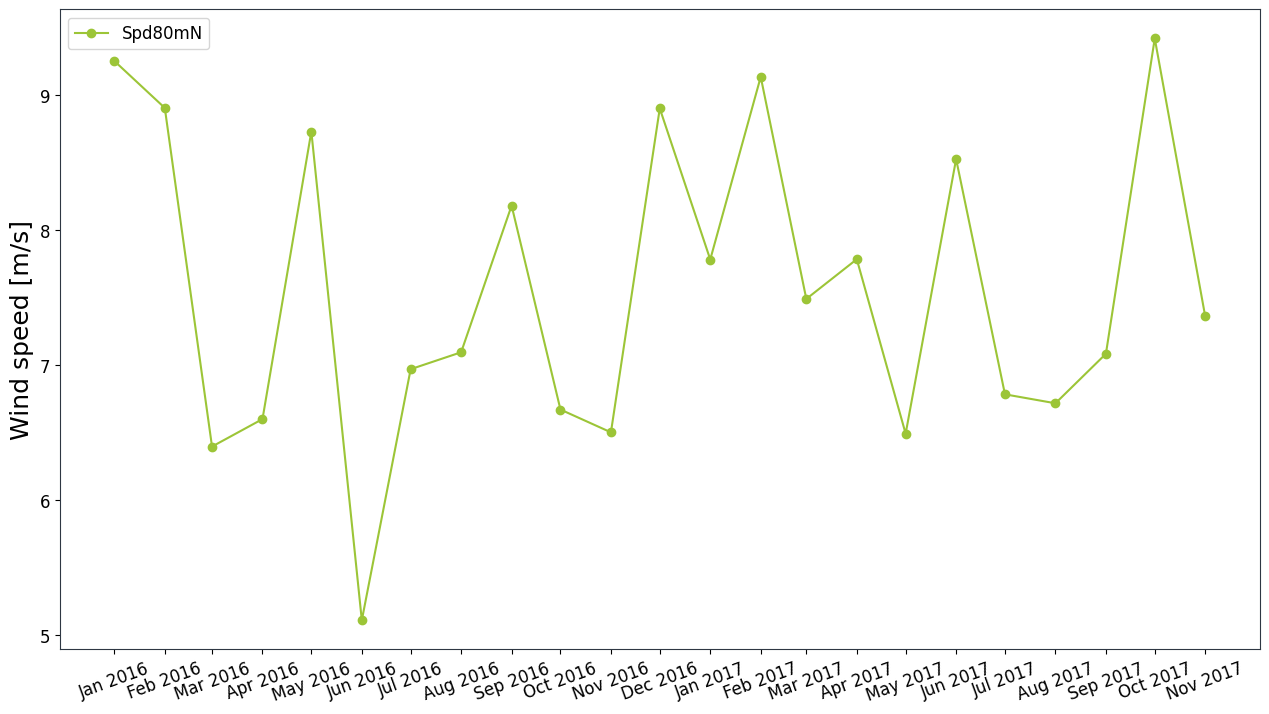

In [8]:
bw.monthly_means(Wspd80mN)

Similarly, you can select a few columns at the same time.

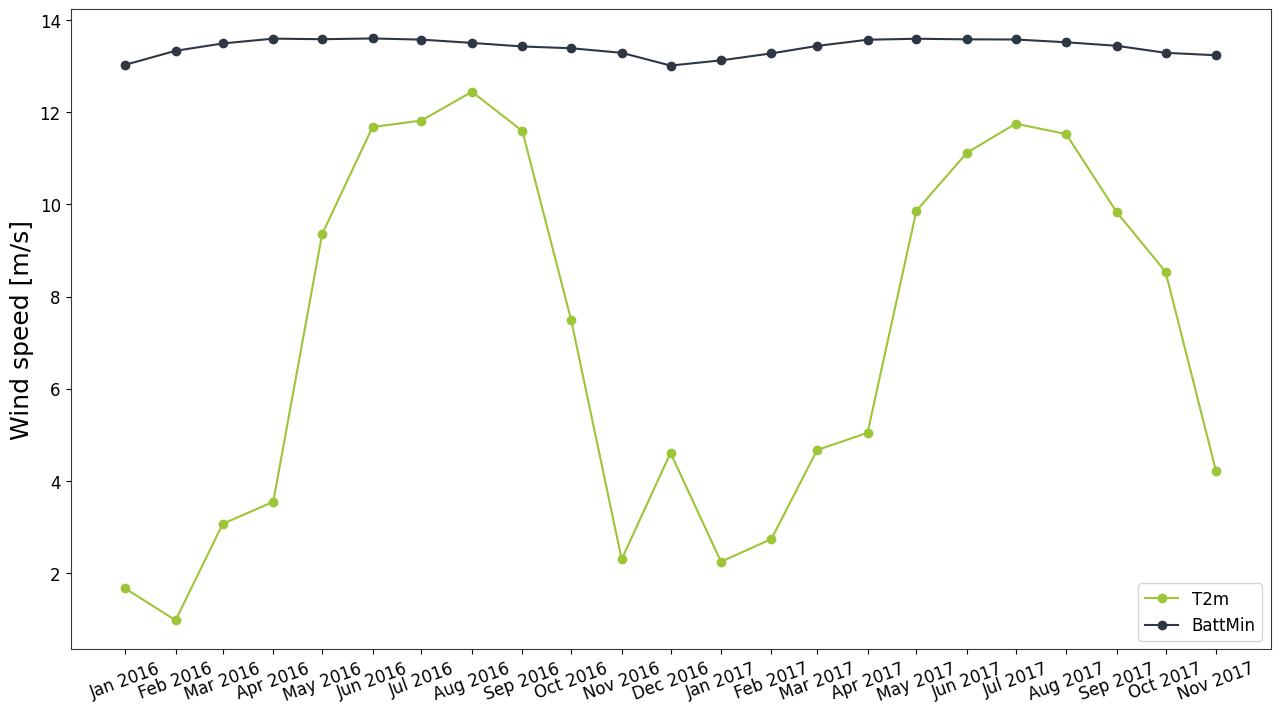

In [9]:
bw.monthly_means(data[['T2m', 'BattMin']])

Another way to select a single column is to use the data.Spd80mN. This only works if you column names have no spaces in them.

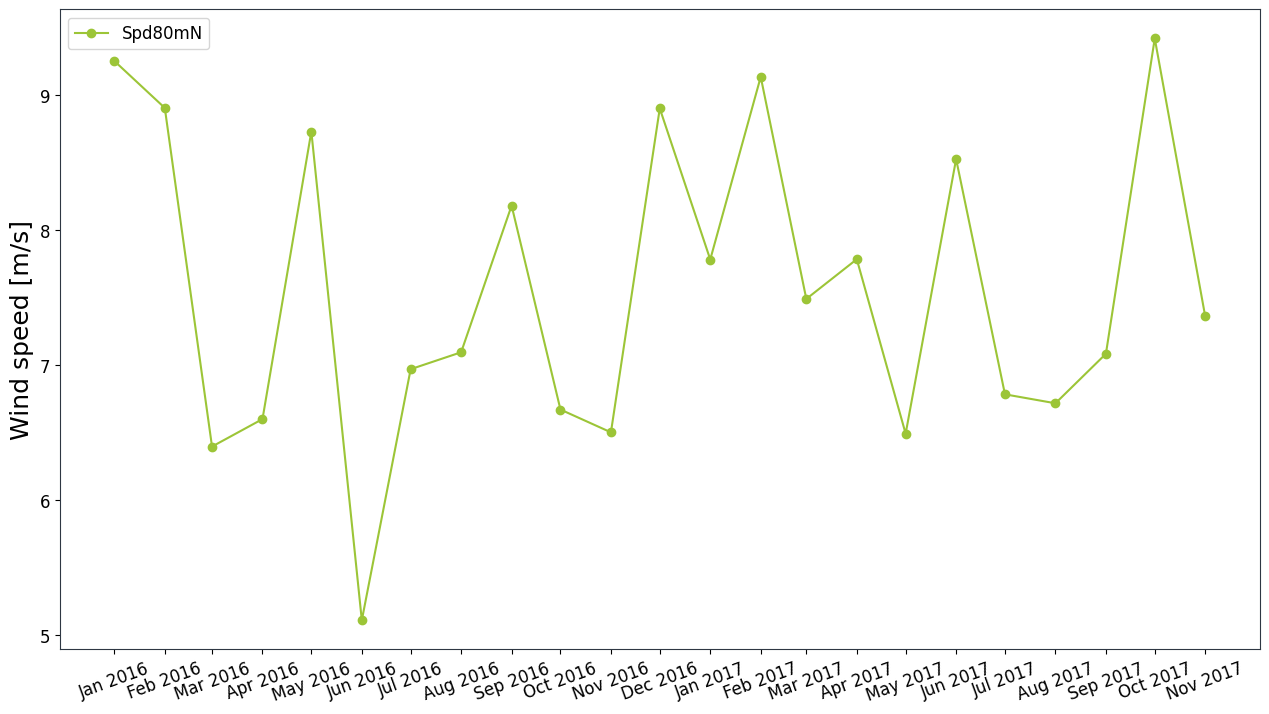

In [10]:
bw.monthly_means(data.Spd80mN)

<font size="6">Step 2: Selecting Ranges</font>

Ranges, or rows, from within a Series or DataFrame can be seleced. The brightwind library always asigns the index of the DataFrame to be a datetime data type making it much easier to work with the DataFrame for wind analysis purposes. For example, to select data points between two dates for the data DataFrame we loaded in:

In [12]:
data['2017-01-01':'2017-02-01']

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.876,5.858,5.747,5.744,5.605,5.558,1.160,1.109,1.186,1.158,...,7.025,275.2,0.0,324.9,6.451,3.077,99.7,966.0,0.0,12.71
2017-01-01 00:10:00,5.911,5.898,5.539,5.621,5.324,5.345,1.114,1.079,1.005,0.977,...,7.498,275.2,0.0,319.6,9.160,2.915,99.8,966.0,0.0,12.71
2017-01-01 00:20:00,7.004,6.967,6.741,6.797,6.645,6.634,1.038,0.998,1.042,1.033,...,6.283,275.2,0.0,316.5,7.228,2.865,99.8,966.0,0.0,12.71
2017-01-01 00:30:00,7.079,7.067,6.832,6.881,6.792,6.801,0.705,0.667,0.707,0.665,...,4.661,275.2,0.0,319.1,5.279,2.693,97.8,966.0,0.0,12.71
2017-01-01 00:40:00,6.796,6.765,6.684,6.742,6.658,6.685,0.794,0.785,0.812,0.792,...,5.036,275.2,0.0,317.3,6.070,2.471,98.4,967.0,0.0,12.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01 23:10:00,11.190,11.410,8.710,10.480,8.240,9.790,1.821,1.691,1.608,1.472,...,7.089,275.2,0.0,172.2,6.555,5.491,100.0,944.0,0.0,12.88
2017-02-01 23:20:00,11.580,11.750,9.150,10.820,8.840,10.120,2.490,2.315,2.191,2.361,...,7.986,275.2,0.0,180.0,8.520,5.542,100.0,944.0,0.1,12.88
2017-02-01 23:30:00,14.320,14.490,10.770,13.280,10.430,12.200,2.221,1.981,1.867,1.856,...,6.347,275.2,0.0,177.7,7.901,5.602,100.0,944.0,0.0,12.88


To select all the data points from a specific date, i.e. 2017-01-01, to the end of the series you can leave the area after the ‘:’ empty.

In [13]:
data['2017-01-01':]

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.876,5.858,5.747,5.744,5.605,5.558,1.160,1.109,1.186,1.158,...,7.025,275.2,0.0,324.9,6.451,3.077,99.7,966.0,0.0,12.71
2017-01-01 00:10:00,5.911,5.898,5.539,5.621,5.324,5.345,1.114,1.079,1.005,0.977,...,7.498,275.2,0.0,319.6,9.160,2.915,99.8,966.0,0.0,12.71
2017-01-01 00:20:00,7.004,6.967,6.741,6.797,6.645,6.634,1.038,0.998,1.042,1.033,...,6.283,275.2,0.0,316.5,7.228,2.865,99.8,966.0,0.0,12.71
2017-01-01 00:30:00,7.079,7.067,6.832,6.881,6.792,6.801,0.705,0.667,0.707,0.665,...,4.661,275.2,0.0,319.1,5.279,2.693,97.8,966.0,0.0,12.71
2017-01-01 00:40:00,6.796,6.765,6.684,6.742,6.658,6.685,0.794,0.785,0.812,0.792,...,5.036,275.2,0.0,317.3,6.070,2.471,98.4,967.0,0.0,12.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-23 10:10:00,10.480,0.000,10.190,9.890,9.590,9.420,0.720,0.000,0.733,0.668,...,0.000,275.2,0.0,222.2,4.111,0.943,99.7,943.0,0.0,13.02
2017-11-23 10:20:00,9.390,0.000,9.120,8.850,8.520,8.340,0.659,0.000,0.734,0.651,...,0.000,275.2,0.0,218.4,4.817,0.792,98.6,943.0,0.0,13.69
2017-11-23 10:30:00,9.140,0.000,8.700,8.450,8.030,7.875,0.689,0.000,0.821,0.732,...,0.000,275.2,0.0,216.0,5.784,0.802,100.0,943.0,0.0,13.86


To select all the data points from the start to a specific date, i.e. 2017-01-01, you can leave the area before the ‘:’ empty.

In [14]:
data[:'2017-01-01']

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.200,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.800,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.800,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.600,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.600,3.540,0.863,100.0,934.0,0.0,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01 23:10:00,10.050,10.130,9.220,9.110,8.070,8.100,0.726,0.683,0.762,0.721,...,3.568,275.2,0.000,15.050,7.453,-0.512,95.5,979.0,0.0,13.00
2017-01-01 23:20:00,11.060,11.150,10.180,10.100,9.140,9.160,0.770,0.750,0.854,0.826,...,2.853,275.2,0.000,12.760,6.748,-0.624,96.1,979.0,0.0,13.00
2017-01-01 23:30:00,10.290,10.380,9.490,9.420,8.470,8.480,0.591,0.554,0.824,0.759,...,3.826,275.2,0.000,11.380,7.505,-0.705,96.8,979.0,0.0,13.00


These operations can also be performed on a specific column:

In [15]:
data['Spd80mN']['2017-01-01':'2017-02-01']

Timestamp
2017-01-01 00:00:00     5.876
2017-01-01 00:10:00     5.911
2017-01-01 00:20:00     7.004
2017-01-01 00:30:00     7.079
2017-01-01 00:40:00     6.796
                        ...  
2017-02-01 23:10:00    11.190
2017-02-01 23:20:00    11.580
2017-02-01 23:30:00    14.320
2017-02-01 23:40:00    12.870
2017-02-01 23:50:00    13.330
Name: Spd80mN, Length: 4608, dtype: float64

These ranges can then too be used within functions, such as monthly_means().

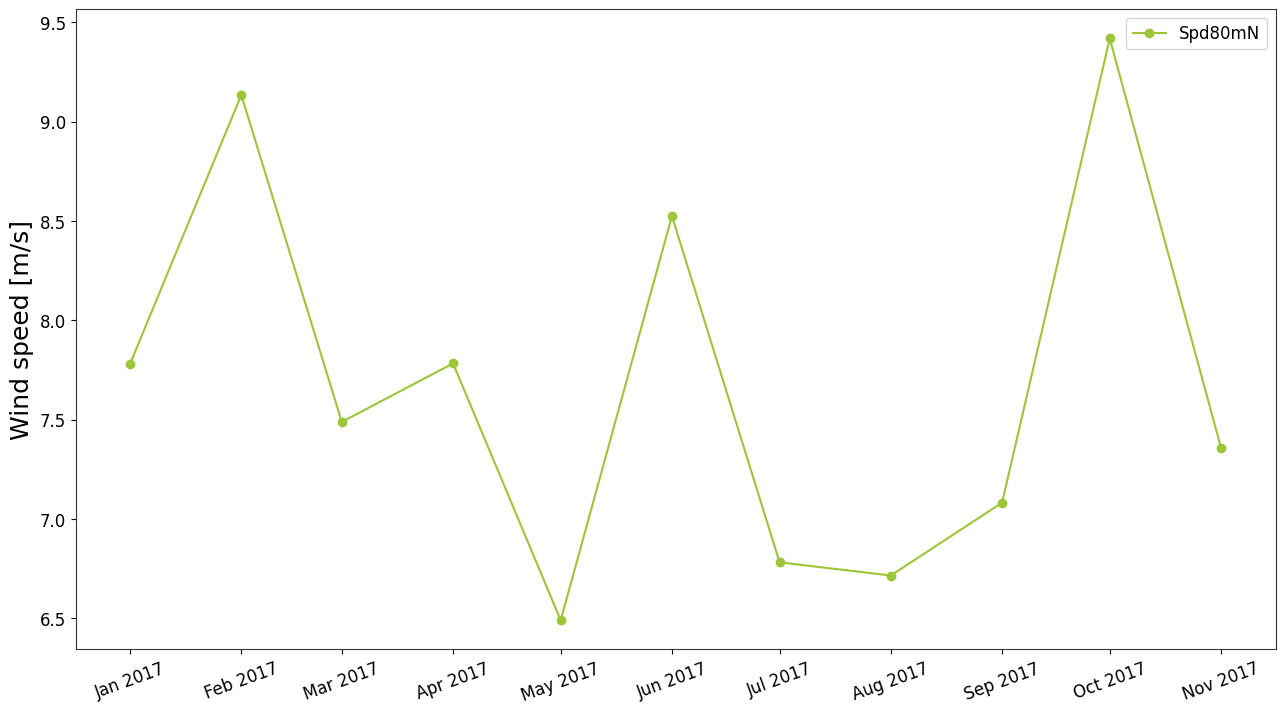

In [16]:
bw.monthly_means(data['Spd80mN']['2017-01-01':])

<font size="6">Step 3: Selecting Specific Entries</font>

Specific entries in DataFrames and Series can be accessed both by their index and columns name, or by their position in the DataFrame or Series.
    

To select a specific entry by its columns name and index, i.e. the entry in the column Spd80mN at timestamp 2016-01-09 17:00:00, type:

In [17]:
data['Spd80mN']['2016-01-09 17:00:00']

7.652

To select a specific entry by its position in the DataFrame, i.e. the 3rd entry in the 1st column, use .iloc. When using Pandas, indexing starts at 0 for both columns and rows of DataFrames and Series. The index for the the 3rd entry in the 1st column would therefore be [2, 0]:

In [18]:
data.iloc[2,0]

7.652

There are many ways to slice and dice a pandas DataFrame making it a little confusing. These are just a few and are for most things all that are required.

In [ ]:
<font size="6">Other correlation methods</font>